In [63]:
import os
import datetime
import random

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# sklearn
from sklearn.model_selection import train_test_split

In [55]:
# tensorflow
import tensorflow as tf

import keras
from keras.models import Sequential  # V2 is tensorflow.keras.xxxx, V1 is keras.xxx
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.models import load_model
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.callbacks import ModelCheckpoint

print( f'tf.__version__: {tf.__version__}' )
print( f'keras.__version__: {keras.__version__}' )


tf.__version__: 2.15.0
keras.__version__: 2.15.0


In [24]:
import cv2
from PIL import Image

In [3]:
data_dir = 'training_data/training_data'
file_list = os.listdir(data_dir)

In [9]:
df = pd.read_csv('training_data/training_norm.csv')
df.head(5)

,image_id,angle,speed
0,1,0.4375,0.0
1,2,0.8125,1.0
2,3,0.4375,1.0
3,4,0.6250,1.0
4,5,0.5000,0.0


In [17]:
image_id = []
image_name = []
image_path = []
image_array = []
file_size = []
for filename in file_list:
    im = cv2.imread(data_dir + '/' + filename)

    image_id.append(int(filename.split('.')[0]))
    # image_name.append(filename)
    image_array.append(im)
    image_path.append(data_dir + '/' + filename)
    file_size.append(os.path.getsize(data_dir + '/' + filename))


In [18]:
data = {
    'image_id': image_id,
    'image': image_array,
    'image_path': image_path,
    'file_size': file_size
}
df_image = pd.DataFrame(data)
df_image.head(5)

,image_id,image,image_path,file_size
0,3975,"[[[150, 129, 118], [135, 113, 103], [158, 108,...",training_data/training_data/3975.png,128771
1,8820,"[[[208, 209, 207], [208, 209, 207], [212, 211,...",training_data/training_data/8820.png,117739
2,9280,"[[[242, 224, 223], [243, 225, 224], [239, 226,...",training_data/training_data/9280.png,119558
3,348,"[[[17, 15, 6], [24, 22, 13], [59, 51, 48], [22...",training_data/training_data/348.png,112400
4,12085,"[[[204, 188, 188], [204, 188, 188], [208, 190,...",training_data/training_data/12085.png,121987


In [19]:
merged_df = pd.merge(df, df_image, how='left', on='image_id')
print(f"Length:{len(merged_df)}")
merged_df.head()

Length:13793


,image_id,angle,speed,image,image_path,file_size
0,1,0.4375,0.0,"[[[134, 135, 139], [134, 135, 139], [136, 139,...",training_data/training_data/1.png,128113
1,2,0.8125,1.0,"[[[160, 144, 142], [155, 140, 138], [156, 136,...",training_data/training_data/2.png,127064
2,3,0.4375,1.0,"[[[65, 40, 60], [66, 41, 61], [63, 53, 55], [6...",training_data/training_data/3.png,126239
3,4,0.6250,1.0,"[[[16, 12, 8], [5, 2, 0], [80, 64, 65], [135, ...",training_data/training_data/4.png,113880
4,5,0.5000,0.0,"[[[189, 163, 165], [190, 164, 166], [203, 170,...",training_data/training_data/5.png,125944


In [20]:
merged_df.describe()

,image_id,angle,speed,file_size
count,13793.000000,13793.000000,13793.000000,13793.000000
mean,6899.790473,0.605062,0.754254,119516.939317
std,3983.649259,0.155558,0.430596,10230.608121
min,1.000000,0.000000,0.000000,71941.000000
25%,3450.000000,0.500000,1.000000,114694.000000
50%,6900.000000,0.625000,1.000000,119772.000000
75%,10350.000000,0.750000,1.000000,124186.000000
max,13798.000000,1.000000,1.428571,166582.000000


### EDA

image_path: training_data/training_data/22.png
steering_Angle: 0.312500
speed: 0


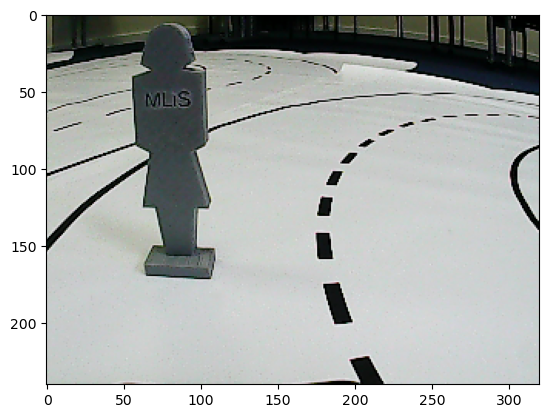

In [25]:
image_index = 21
plt.imshow(Image.open(merged_df['image_path'][image_index]))
print("image_path: %s" % merged_df['image_path'][image_index])
print("steering_Angle: %f" % merged_df['angle'][image_index])
print("speed: %d" % merged_df['speed'][image_index])

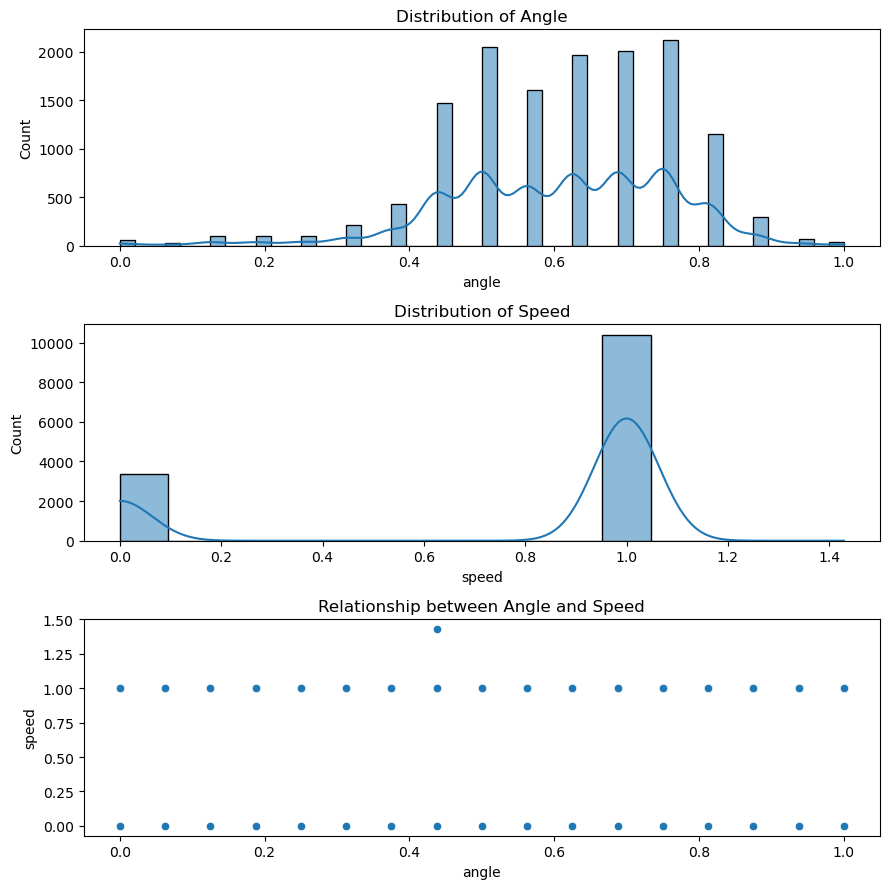

In [34]:
# Set up the matplotlib figure
plt.figure(figsize=(9, 9))

# First subplot: Distribution of the 'angle' variable
plt.subplot(3, 1, 1)  # (1 row, 3 cols, 1st plot)
sns.histplot(df['angle'], kde=True)
plt.title('Distribution of Angle')

# Second subplot: Distribution of the 'speed' variable
plt.subplot(3, 1, 2)  # (1 row, 3 cols, 2nd plot)
sns.histplot(df['speed'], kde=True)
plt.title('Distribution of Speed')

# Third subplot: Relationship between 'angle' and 'speed'
plt.subplot(3, 1, 3)  # (1 row, 3 cols, 3rd plot)
sns.scatterplot(x='angle', y='speed', data=df)
plt.title('Relationship between Angle and Speed')

# Show the plot
plt.tight_layout()
plt.show()

In [42]:
len(merged_df[merged_df['speed'] > 1])

1

Training data: 8275
Validation data: 5518


Text(0.5, 1.0, 'Validation Data')

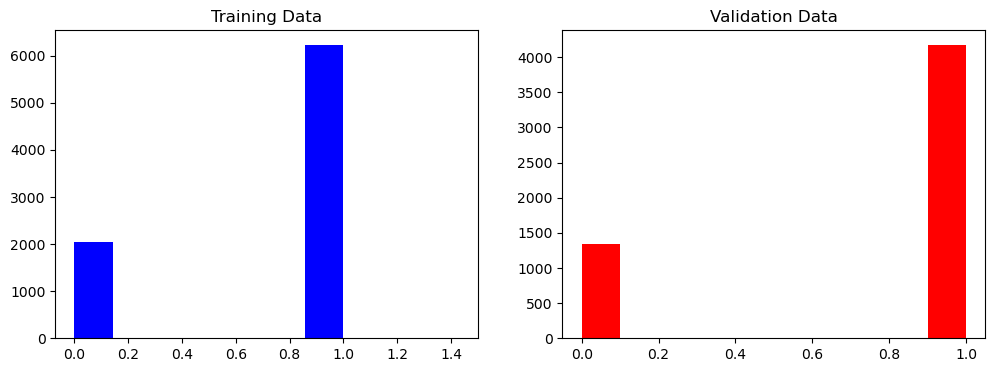

In [46]:
X_train, X_valid, y_train, y_valid = train_test_split(merged_df['image_path'].to_list(), merged_df['speed'].to_list(), test_size=0.4)
print("Training data: %d\nValidation data: %d" % (len(X_train), len(X_valid)))

# plot the distributions of train and valid, make sure they are consistent
fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].hist(y_train, color='blue')
axes[0].set_title('Training Data')
axes[1].hist(y_valid, color='red')
axes[1].set_title('Validation Data')

## Preprocessing

Text(0.5, 1.0, 'processed')

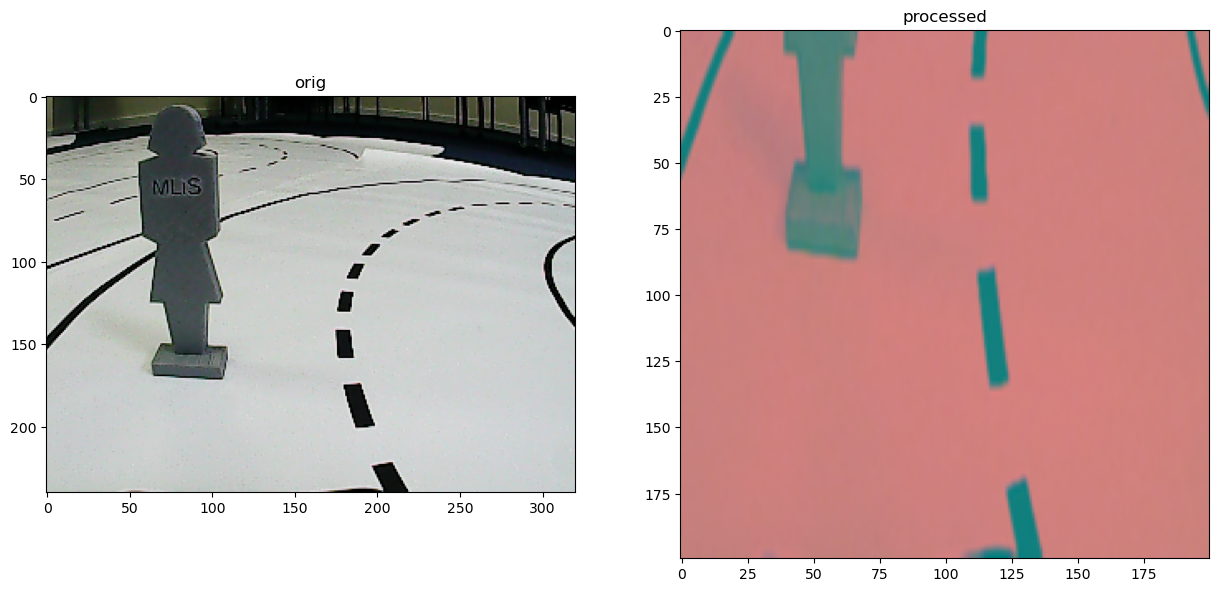

In [48]:
def my_imread(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

def img_preprocess(image):
    height, _, _ = image.shape
    image = image[int(height/2):,:,:]  # remove top half of the image, as it is not relavant for lane following
    image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)  # Nvidia model said it is best to use YUV color space
    image = cv2.GaussianBlur(image, (3,3), 0)
    image = cv2.resize(image, (200,200)) # input image size (200,66) Nvidia model
    image = image / 255 # normalizing, the processed image becomes black for some reason.  do we need this?
    return image

fig, axes = plt.subplots(1, 2, figsize=(15, 10))
image_orig = my_imread(merged_df['image_path'][image_index])
image_processed = img_preprocess(image_orig)
axes[0].imshow(image_orig)
axes[0].set_title("orig")
axes[1].imshow(image_processed)
axes[1].set_title("processed")

In [49]:
def image_data_generator(image_paths, steering_angles, batch_size):
    while True:
        batch_images = []
        batch_steering_angles = []
        
        for i in range(batch_size):
            random_index = random.randint(0, len(image_paths) - 1)
            image = my_imread(image_paths[random_index])
            steering_angle = steering_angles[random_index]
              
            image = img_preprocess(image)
            batch_images.append(image)
            batch_steering_angles.append(steering_angle)
            
        yield( np.asarray(batch_images), np.asarray(batch_steering_angles))

In [50]:
def nvidia_model():
    model = Sequential(name='Nvidia_Model')
    model.add(tf.keras.applications.mobilenet_v2.MobileNetV2(include_top = False, weights="imagenet", input_shape=(200, 200, 3)))
    model.add(tf.keras.layers.GlobalAveragePooling2D())
    model.add(Dense(1, activation = 'sigmoid'))
    model.layers[0].trainable = False

    model.compile(optimizer=tf.optimizers.RMSprop(lr=0.01), loss='binary_crossentropy', metrics='accuracy')

    return model

In [51]:
model = nvidia_model()
model.summary()

9406464/9406464 [==============================] - 0s 0us/step


Model: "Nvidia_Model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Func  (None, 7, 7, 1280)        2257984   
 tional)                                                         
                                                                 
 global_average_pooling2d (  (None, 1280)              0         
 GlobalAveragePooling2D)                                         
                                                                 
 dense (Dense)               (None, 1)                 1281      
                                                                 
Total params: 2259265 (8.62 MB)
Trainable params: 1281 (5.00 KB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________


In [56]:
model_output_dir = 'models/speed'

# start Tensorboard before model fit, so we can see the epoch tick in Tensorboard
# Jupyter Notebook embedded Tensorboard is a new feature in TF 2.0!!  

# clean up log folder for tensorboard
log_dir_root = f'{model_output_dir}/logs' + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
#!rm -rf $log_dir_root

tensorboard_callback = TensorBoard(log_dir_root, histogram_freq=1)

# Specify the file path where you want to save the model
filepath = 'models/speed/{epoch:02d}-{val_loss:.2f}.hdf5'

# Create the ModelCheckpoint callback
model_checkpoint_callback = ModelCheckpoint(
    filepath,
    monitor='val_loss',     # Monitor validation loss
    verbose=1,              # Log a message each time the callback saves the model
    save_best_only=True,    # Only save the model if 'val_loss' has improved
    save_weights_only=True, # Only save the weights of the model
    mode='min',             # 'min' means the monitored quantity should decrease
    save_freq='epoch'       # Check every epoch
)

In [58]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


In [59]:
os.makedirs(log_dir_root, exist_ok=True)
%tensorboard --logdir {log_dir_root}

In [60]:
from tensorboard import notebook
notebook.list() # View open TensorBoard instances

Known TensorBoard instances:
  - port 6006: logdir models/speed/logs20240316-005558 (started 0:00:36 ago; pid 25019)


In [61]:
'''
Connect to the below link.
http://localhost:port
'''

'\nConnect to the below link.\nhttp://localhost:port\n'

In [64]:
history = model.fit(
    image_data_generator(X_train, y_train, batch_size=200),
    steps_per_epoch=500,
    epochs=10,
    validation_data = image_data_generator(X_valid, y_valid, batch_size=200),
    validation_steps=200,
    verbose=1,
    shuffle=1,
    callbacks=[checkpoint_callback, tensorboard_callback]
)

Epoch 1/10
500/500 [==============================] - ETA: 0s - loss: 0.2003 - accuracy: 0.9233
Epoch 1: val_loss improved from inf to 0.15886, saving model to models/speed/lane_navigation_check.h5


/Users/shayan/anaconda3/envs/my_adc/lib/python3.9/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


500/500 [==============================] - 1139s 2s/step - loss: 0.2003 - accuracy: 0.9233 - val_loss: 0.1589 - val_accuracy: 0.9429
Epoch 2/10
500/500 [==============================] - ETA: 0s - loss: 0.1388 - accuracy: 0.9486